In [ ]:
from numpy.core.fromnumeric import cumsum
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#直接在視窗顯示圖表
%matplotlib inline

#顯示到小數點第3位
%precision 3

data = np.array([9,2,3,4,10,6,7,8,1,5])
print(data)
print('資料型態：',data.dtype) #int64,具有正負號的64位元整數 #float(浮點數)/uint(無正負號之整數)/bool
print('維度：',data.ndim)
print('元素數量：',data.size)
print(data*2)

a=np.array([1,2,3,4,5,6,7,8,9,10])
print('乘法：', a*a)
print('平方：', a**2)
print('除法：', a/a[::-1])

b=[9,2,3,4,10,6,7,8,1,5]
print(b)
print(sorted(b))
print(sorted(b)[::-1])
print('最大值：',max(b))
print('最小值：',min(b))
print('總和：',sum(b))
print('累積和：',cumsum(sorted(b)))
print('累積比例：',cumsum(sorted(b))/sum(b))


產生隨機變數與隨機抽樣

In [ ]:
random.seed(0)
# 產生常態分佈(平均為0、標準差為1)的10個亂數
rnd_data=random.randn(10)
print('含有10個亂數的陣列：',rnd_data)
rnd_data=random.rand(10)
print('0到1之間均勻亂數：',rnd_data)
rnd_data=random.random_sample(10)
print('0到1之間隨機亂數：',rnd_data)
rnd_data=random.randint(1,10,(5,3)) #做出五列三行的隨機整數
print('1到10之間隨機整數：',rnd_data)
rnd_data=random.normal(0,1,100) #平均值為0標準差為1的100個常態分佈亂數
print('平均值為0標準差為1的100個常態分佈亂數：',rnd_data)
print(abs(0 - np.mean(rnd_data)))
print(abs(1 - np.std(rnd_data, ddof=1)))
rnd_data=random.binomial(1,0.5,100) #每次測試翻10次，出現正面機率為0.5，測試100次看每次測試出現正面的次數
print('平均值為0標準差為1的100個常態分佈亂數：',rnd_data)
rnd_data=random.beta(100,100,30) #測試30次，正面出現100且反面也出現100的機率，次數若為1/1機率變動大 #Beta分佈
print('平均值為0標準差為1的100個常態分佈亂數：',rnd_data)
rnd_data=random.gamma(2,2,30) #Gamma分佈(shape, scale, size)
print('Gamma分佈：',rnd_data)
rnd_data=random.chisquare(2,4) #chisquare分佈(df, size)
print('chisquare分佈：',rnd_data)

print('----------------------------------------------------')
data_new=np.array([9,2,3,4,10,6,7,8,1,5])
# 隨機取出
# 取出10個(允許重複，放回抽樣)
print(random.choice(data_new, 10))
# 取出10個(不允許重複，放回抽樣)
print(random.choice(data_new, 10, replace = False))


In [ ]:
N=10**6
normal_data = [random.random() for _ in range(N)]
numpy_random_data=np.array(normal_data)

%timeit sum(normal_data)
%timeit np.sum(numpy_random_data)

矩陣

In [ ]:
array=np.arange(9)
print(array)
array1=np.arange(9).reshape(3,3)
print(array1)
print(array1[0,:])
print(array1[:,0])

array2=np.arange(9,18).reshape(3,3)
print(array1*array2) #元素各自乘積
print(np.dot(array1,array2)) #矩陣積

print(np.zeros((2,3), dtype=np.int64))
print(np.ones((2,3), dtype=np.float64))

Practice_1
1. 使用np.array創建1~50的陣列後再計算總和
2. 生成10個常態分佈亂數，並計算最小值、最大值與總和
3. 製作均為3的5*5矩陣，並計算其平方

In [ ]:
a=np.arange(1,50)
print(sum(a))

b=np.random.normal(0,1,10)
print(max(b),' ',min(b),' ',sum(b))

c=np.zeros((5,5),dtype=np.int64)
for i in range(0,5):
  for j in range(0,5):
    c[i,j]=3
print(c**2)

Scipy基礎語法

In [ ]:
import scipy.linalg as linalg
from scipy.optimize import minimize_scalar
from scipy.optimize import newton

matrix=np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])
print('行列式計算')
print(linalg.det(matrix))
print('反矩陣')
print(linalg.inv(matrix))
print('原始矩陣*反矩陣=單位矩陣')
print(np.dot(matrix,linalg.inv(matrix)))
print(matrix.dot(linalg.inv(matrix)))

#特徵值與特徵向量
eig_value,eig_vector=linalg.eig(matrix)
print('特徵值')
print(eig_value)
print('特徵向量')
print(eig_vector)

#牛頓法求解
def my_function(x):
  return (x**2+2*x+1)
print(newton(my_function,0)) #式子等於0求解
print(minimize_scalar(my_function,method= 'Brent'))


Practice_2
1. 計算矩陣([[1,2,3],[1,3,2],[3,1,2]])之行列式
2. 計算反矩陣、特徵值與特徵向量
3. 求解f(x)=x**3+2*x+1=0


In [ ]:
matrix_new=np.array([[1,2,3],[1,3,2],[3,1,2]])
print(linalg.det(matrix_new))

print(linalg.inv(matrix_new))
eig_value,eig_vector=linalg.eig(matrix_new)
print('特徵值')
print(eig_value)
print('特徵向量')
print(eig_vector)

def my_function1(x):
  return (x**3+2*x+1)
print(newton(my_function1,0))

-12.0
[[-0.333  0.083  0.417]
 [-0.333  0.583 -0.083]
 [ 0.667 -0.417 -0.083]]
特徵值
[ 6.   +0.j -1.414+0.j  1.414+0.j]
特徵向量
[[-0.577 -0.722  0.16 ]
 [-0.577 -0.143 -0.811]
 [-0.577  0.677  0.563]]
-0.45339765151640365


Pandas的基礎

In [ ]:
from pandas import Series, DataFrame
sample_pandas_data = pd.Series([0,10,20,30,40,50,60,70,80,90])
print(sample_pandas_data)
sample_pandas_index_data = pd.Series(
    [0,10,20,30,40,50,60,70,80,90],
    index=['a','b','c','d','e','f','g','h','i','j']) #改index
print(sample_pandas_index_data)
print('資料值：',sample_pandas_index_data.values)
print('索引值：',sample_pandas_index_data.index)

attri_data1 = {'ID':['100','101','102','103','104'],
               'City':['Tokyo','Osaka','Kyoto','Hokkaido','Tokyo'],
               'Birth_year':[1990,1989,1992,1997,1982],
               'Name':['Hiroshi','Akiko','Yuki','Satoru','Steve']}
attri_data_frame1 = DataFrame(attri_data1)
print(attri_data_frame1)

attri_data_frame_index1 = DataFrame(attri_data1, index=['a','b','c','d','e'])
print(attri_data_frame_index1)
print(attri_data_frame_index1.T)
print(attri_data_frame_index1.Birth_year)
print(attri_data_frame_index1[['ID','Birth_year']]) # 只抓取某些欄位的資料
print(attri_data_frame_index1[attri_data_frame_index1['City']=='Tokyo'])
print(attri_data_frame_index1[attri_data_frame_index1['City'].isin(['Tokyo','Osaka'])])
print(attri_data_frame_index1.drop(['Birth_year'],axis=1)) # 去除某一欄

attri_data2 = {'ID':['100','101','102','103','104'],
               'Math':[50,43,33,76,98],
               'English':[90,20,30,50,30],
               'Sex':['M','F','F','M','M']}
attri_data_frame2 = DataFrame(attri_data2)

print(pd.merge(attri_data_frame1,attri_data_frame2)) # 會自動以ID來merge
print(attri_data_frame2.groupby('Sex')['Math'].mean())

attri_data_frame_index2 = DataFrame(attri_data2, index=['a','b','c','d','e'])
print(attri_data_frame_index2.sort_index())
print(attri_data_frame_index2.Math.sort_values())

print(attri_data_frame_index1.isin(['Tokyo']))
attri_data_frame_index1['Name']=np.nan
print(attri_data_frame_index1.isnull())
print(attri_data_frame_index1.isnull().sum())

Practice_3
1. 找出Money為500以上的
2. 以男女分開計算Money
3. 使用ID合併資料後計算Money/Math/English平均

In [ ]:
from pandas import DataFrame
import pandas as pd

attri_data1 = {'ID':['1','2','3','4','5'],
               'Sex':['F','F','M','M','F'],
               'Money':[1000,2000,500,300,700],
               'Name':['Saito','Horie','Kondo','Kawada','Matsubara']}
attri_data_frame1 = DataFrame(attri_data1)

attri_data2 = {'ID':['3','4','7'],
               'Math':[60,30,40],
               'English':[80,20,30]}
attri_data_frame2 = DataFrame(attri_data2)

print(attri_data_frame1[attri_data_frame1['Money'] >= 500])
print(attri_data_frame1.groupby('Sex').Money.mean())

attri_data_frame3=pd.merge(attri_data_frame1,attri_data_frame2)
print(attri_data_frame3)
print(attri_data_frame3.Money.mean())
print(attri_data_frame3.Math.mean())
print(attri_data_frame3.English.mean())


Matplotlib基礎

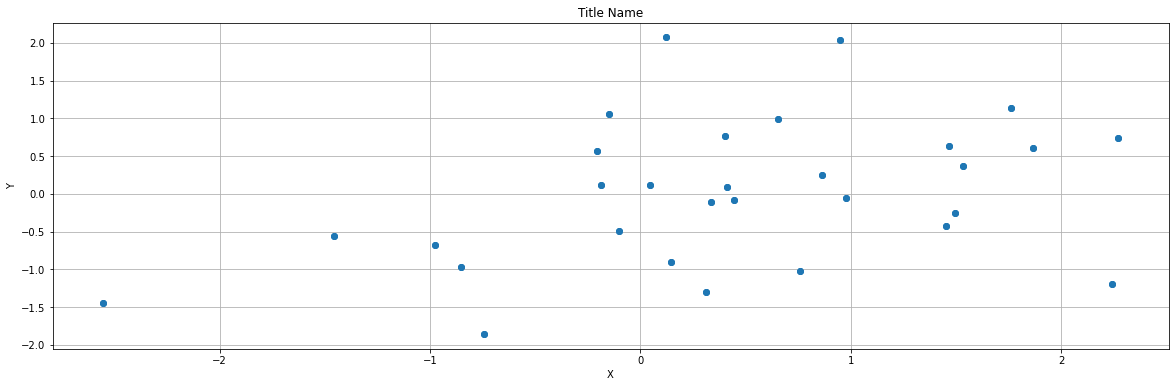

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0)

x=np.random.randn(30)
y=np.sin(x)+np.random.randn(30)

plt.figure(figsize=(20,6))
plt.plot(x,y,'o')
plt.scatter(x,y)

plt.title('Title Name')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

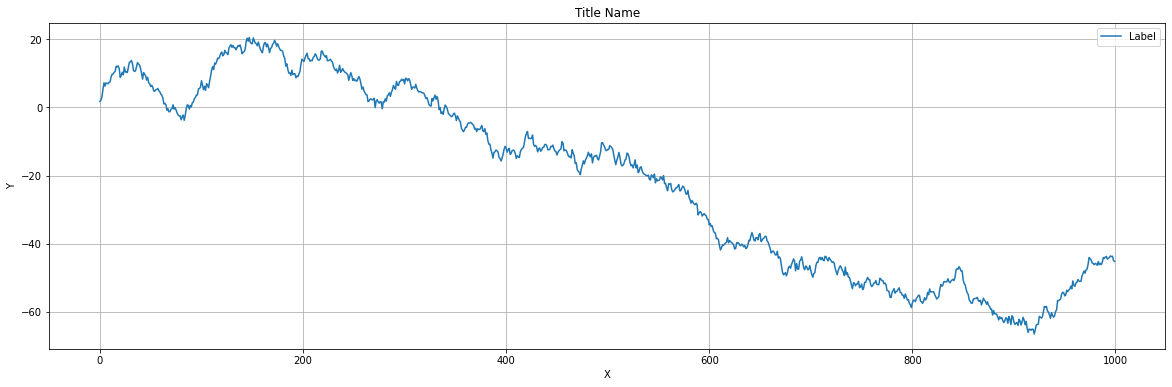

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0)

x=np.arange(1000)
y=np.random.randn(1000).cumsum()

plt.figure(figsize=(20,6))
plt.plot(x,y,label='Label')
plt.legend()

plt.title('Title Name')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

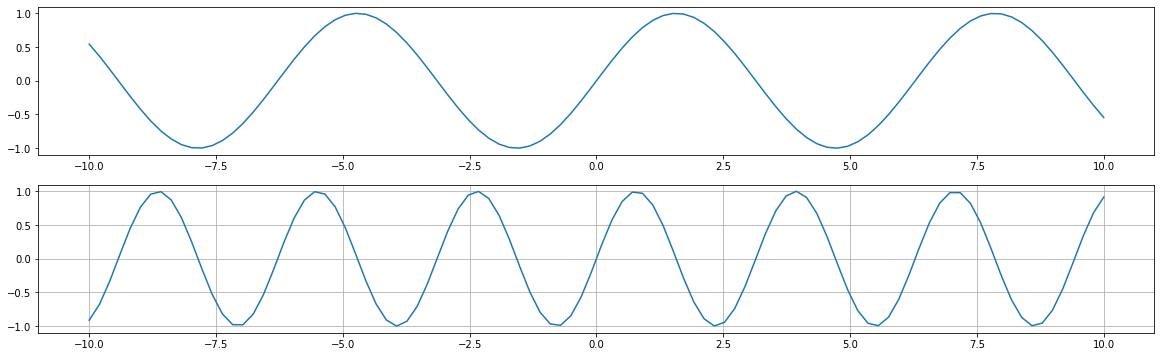

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
x=np.linspace(-10,10,100)
plt.plot(x,np.sin(x))

plt.subplot(2,1,2)
plt.plot(x,np.sin(2*x))

plt.grid(True)

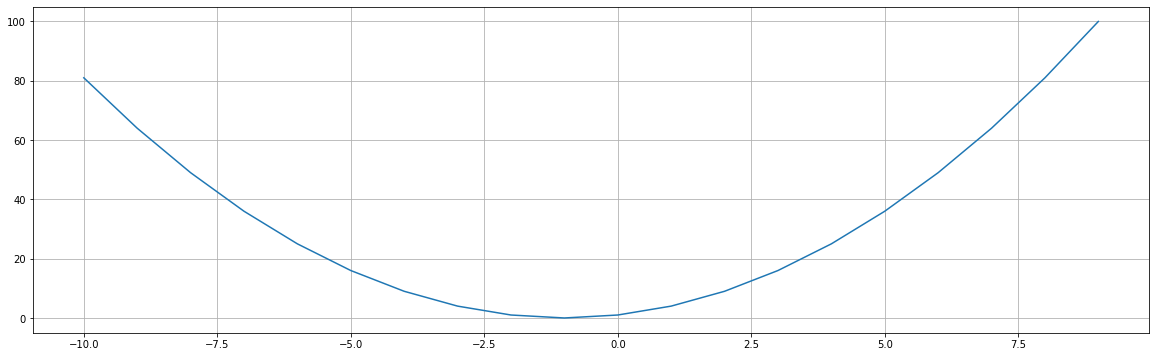

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def my_function(x):
  return x**2+2*x+1

x=np.arange(-10,10)
plt.figure(figsize=(20,6))
plt.plot(x,my_function(x))
plt.grid(True)

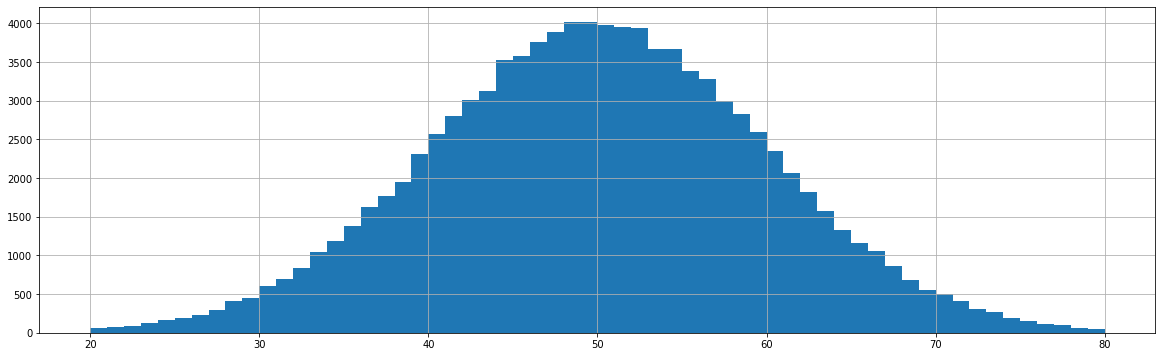

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0)

plt.figure(figsize=(20,6))

plt.hist(np.random.randn(10**5)*10+50, bins=60, range=(20,80)) #bins直條的個數 range範圍
plt.grid(True)

?plt.hist

Practice_04
1. 繪圖y=5x+3
2. 重疊繪圖y=sin(x) y=cos(x)
3. 兩組0~1的均勻亂數(random.uniform)1000個,並與10000/100000個比較histogram差異
4. Monte-Carlo求圓周率(提示:隨機在0~1之間的x/y值,平方相加<=1)

3.1564


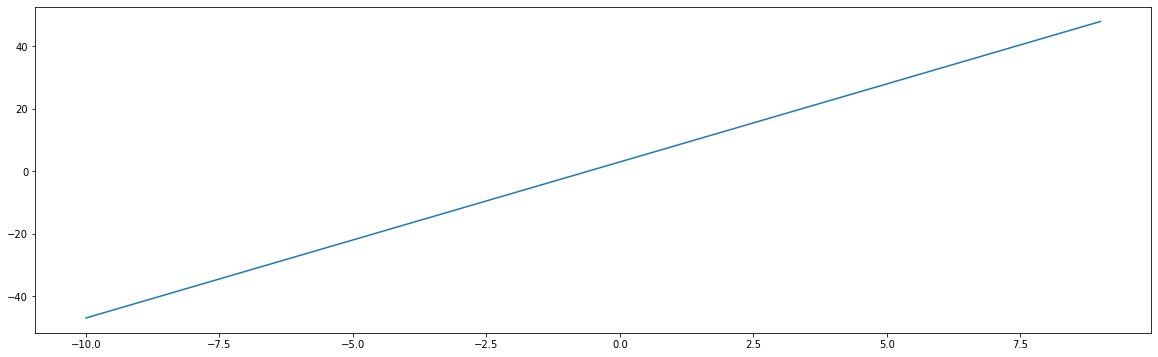

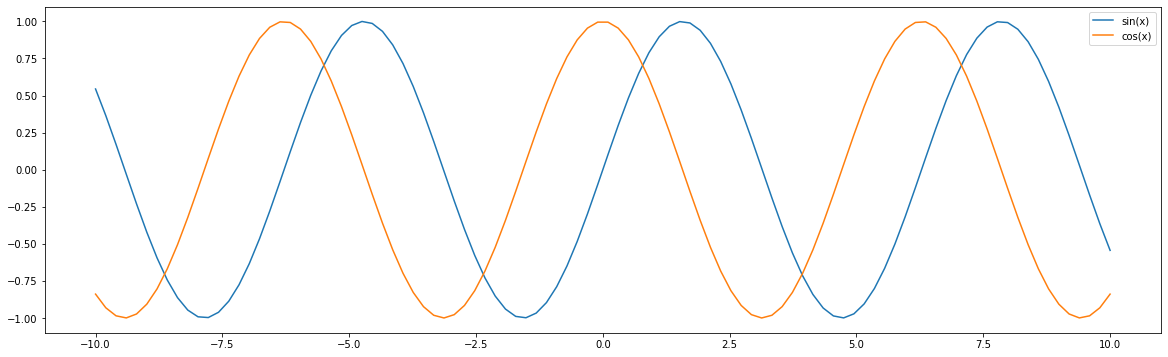

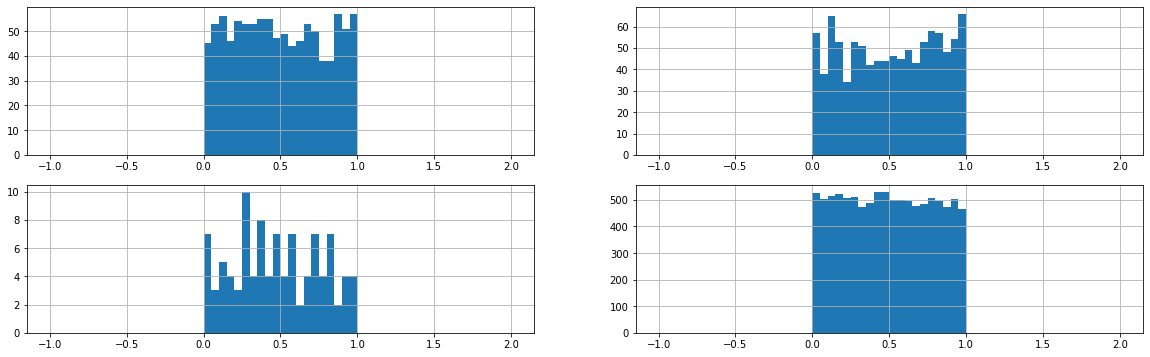

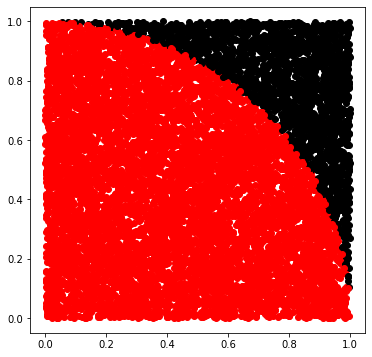

In [133]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0)

plt.figure(figsize=(20,6))
def my_function(x):
  return 5*x+3
x=np.arange(-10,10)
plt.plot(x,my_function(x))

plt.figure(figsize=(20,6))
x=np.linspace(-10,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.legend(['sin(x)','cos(x)'])

plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.hist(np.random.uniform(0,1,1000), bins=60, range=(-1,2)) #bins直條的個數 range範圍
plt.grid(True)
plt.subplot(2,2,2)
plt.hist(np.random.uniform(0,1,1000), bins=60, range=(-1,2)) #bins直條的個數 range範圍
plt.grid(True)
plt.subplot(2,2,3)
plt.hist(np.random.uniform(0,1,100), bins=60, range=(-1,2)) #bins直條的個數 range範圍
plt.grid(True)
plt.subplot(2,2,4)
plt.hist(np.random.uniform(0,1,10000), bins=60, range=(-1,2)) #bins直條的個數 range範圍
plt.grid(True)

plt.figure(figsize=(6,6))
x=np.random.uniform(0,1,10000)
y=np.random.uniform(0,1,10000)
num=0
for i in range(10000):
  if x[i]**2+y[i]**2 <= 1:
    plt.plot(x[i],y[i],'ro')
    num += 1
  else:
    plt.plot(x[i],y[i],'ko')

print(num*4/10000)